# Modéle linéaire généralisé

Pour un intervalle $[A,B]$ de $\mathbb{R}$ fixé: on considère donnés des points $(x_1,...,x_n)$ et des mesures bruitées en ces points $(m_1,...,m_n)$.

On considère $d\geq 1$ et $\epsilon>0$, et on introduit $b_i:=A+\frac{i}{d}(B-A)$ (pour $0\leq i\leq d$) alors pour des coefficients réels $c:=(c_0,...,c_d)\in \mathbb{R}^{d+1}$ on considère le modèle
$$
p_c(x):=\sum_{i=0}^{n}c_i \exp\left(\frac{-(x-b_i)^2}{2 \epsilon}\right)
$$
L'objectif est alors de trouver $c^*$ minimisant la fonction 
$$
E(c):=\frac{1}{2n}\sum_{k=1}^n (p_c(x_k) - m_k)^2
$$

**Remarque** La fonction $p_c$ dépent non linéairement de $x$ mais linéairement du vecteur $c$ par rapport auquel on minimise. On dit qu'il s'agit d'un modèle linéaire généralisé.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [15]:
# Q. Coder ce qui précède

class Realite:
    def __init__(self, gauche, droite, fonction):
        self.gauche = gauche
        self.droite = droite
        self.fonction = fonction
        
    def dessine(self, repere):
        x = np.linspace(self.gauche, self.droite, 100)
        y = self.fonction(x)
        repere.plot(x, y, color="black", label="fonction cachée")

In [59]:
class Donnees:
    def __init__(self, points, mesures):
        self.points =  points
        self.mesures = mesures
        
    def dessine(self, repere):
        repere.scatter(self.points, self.mesures, label="mesures bruitées")

In [12]:
def echantillon_deterministe(taille: int, reel: Realite, epsilon: float) -> Donnees:
    points = np.linspace(reel.gauche, reel.droite, taille)
    valeurs = reel.fonction(points)
    mesures = valeurs + np.random.normal(loc=0.0, scale=epsilon, size=(taille,))
    return Donnees(points=points, mesures=mesures)

In [16]:
ma_realite = Realite(gauche=0.0, droite=10.0, fonction=lambda x: np.sin(2 * x) * np.exp( x / 10.))

In [22]:
mes_donnees = echantillon_deterministe(taille=20, reel=ma_realite, epsilon=0.2)

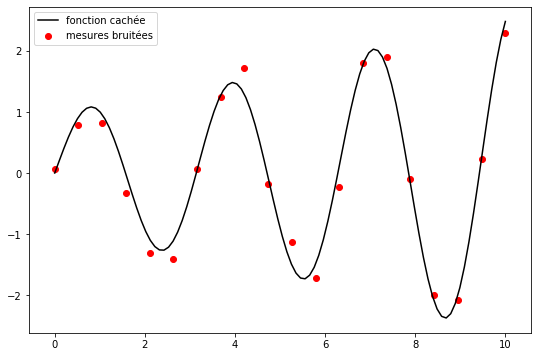

In [23]:
fig, rep = plt.subplots(figsize=(9, 6))
ma_realite.dessine(rep)
mes_donnees.dessine(rep)
rep.legend()

In [43]:
class Modele:
    def __init__(self, nb_bases:int, epsilon: float, realite: Realite):
        self.realite = realite
        self.bases = np.linspace(realite.gauche, realite.droite, nb_bases)
        self.nb_bases = nb_bases
        self.epsilon = epsilon
              
    def evalue(self, points, coefficients):
        resultat = 0
        for coef, base in zip(coefficients, self.bases):
            resultat = resultat + coef * np.exp(-(points - base) ** 2 / (2 * self.epsilon) )
        return resultat
        
    def entrainement(self, donnees: Donnees):
        def erreur(cs):
            return (
                np.sum(
                    (
                        self.evalue(points=donnees.points, coefficients=cs) 
                        - donnees.mesures
                    ) ** 2
                )
                / (2 * len(donnees.points))
            )
        resultat = opt.minimize(fun=erreur, x0=np.zeros_like(self.bases))
        if resultat.success:
            self._meilleurs_coefficients = resultat.x
            self.erreur_minimale = resultat.fun
        else:
            raise ValueError("Impossible de faire converger le solveur")
                
    def dessine(self, rep):
        x = np.linspace(self.realite.gauche, self.realite.droite, 100)
        if "_meilleurs_coefficients" in self.__dict__:
            y = self.evalue(x, self._meilleurs_coefficients)
        else:
            raise ValueError("Il faut d'abord entrainer le modèle!")
        rep.plot(x, y, label="prédicteur {}, {}".format(self.nb_bases, self.epsilon))

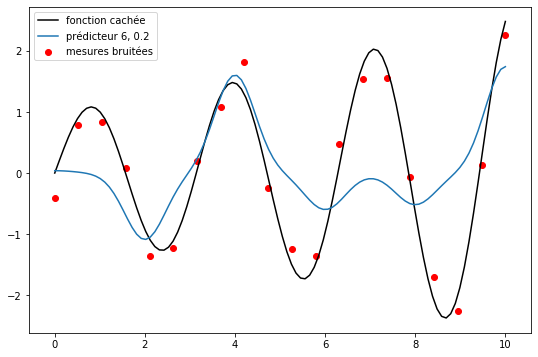

In [44]:
ma_realite = Realite(gauche=0.0, droite=10.0, fonction=lambda x: np.sin(2 * x) * np.exp( x / 10.))
mes_donnees = echantillon_deterministe(taille=20, reel=ma_realite, epsilon=0.2)
modele = Modele(nb_bases=6, epsilon=0.2, realite=ma_realite)
modele.entrainement(mes_donnees)

fig, rep = plt.subplots(figsize=(9, 6))
ma_realite.dessine(rep)
mes_donnees.dessine(rep)
modele.dessine(rep)
rep.legend()

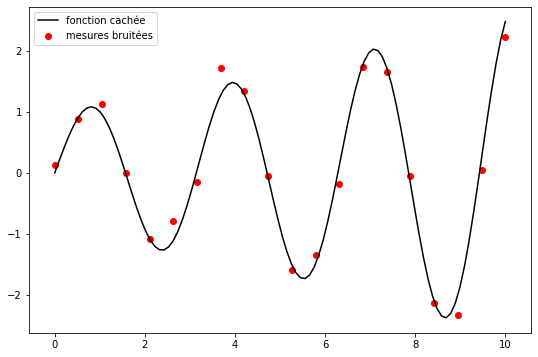

In [57]:
# Q. Etudier l'impact des paramètres nb_bases et epsilon sur la précision du modèle

ma_realite = Realite(gauche=0.0, droite=10.0, fonction=lambda x: np.sin(2 * x) * np.exp( x / 10.))
mes_donnees = echantillon_deterministe(taille=20, reel=ma_realite, epsilon=0.2)
fig, rep = plt.subplots(figsize=(9, 6))
ma_realite.dessine(rep)
mes_donnees.dessine(rep)
rep.legend()

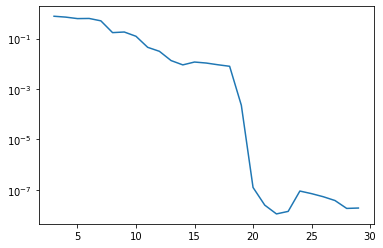

In [55]:
complexite = [n for n in range(3, 30)]
erreurs = list()
for nb_bases in complexite:
    modele = Modele(nb_bases=nb_bases, epsilon=0.2, realite=ma_realite)
    modele.entrainement(mes_donnees)
    erreurs.append(modele.erreur_minimale)
    
plt.semilogy(complexite, erreurs)


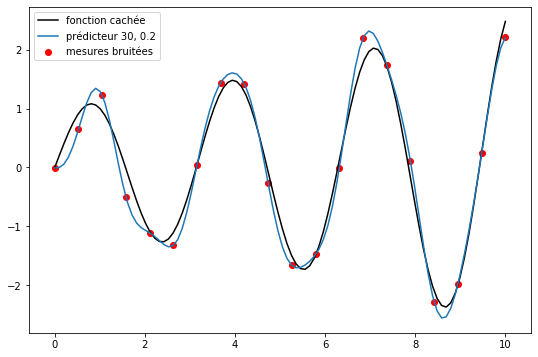

In [56]:
modele = Modele(nb_bases=30, epsilon=0.2, realite=ma_realite)
modele.entrainement(mes_donnees)

fig, rep = plt.subplots(figsize=(9, 6))
ma_realite.dessine(rep)
mes_donnees.dessine(rep)
modele.dessine(rep)
rep.legend()

In [58]:
# Q. Etudier l'impact de l'échantillonage sur la précision du modèle

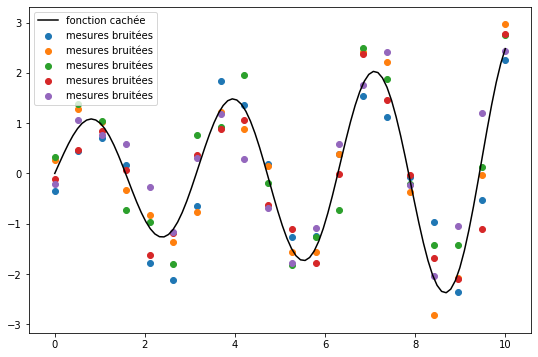

In [60]:
ma_realite = Realite(gauche=0.0, droite=10.0, fonction=lambda x: np.sin(2 * x) * np.exp( x / 10.))

jeux_donnees = [
    echantillon_deterministe(taille=20, reel=ma_realite, epsilon=0.5) for _ in range(5)
]

fig, rep = plt.subplots(figsize=(9, 6))
ma_realite.dessine(rep)
for donnees in jeux_donnees:
    donnees.dessine(rep)
    
rep.legend()

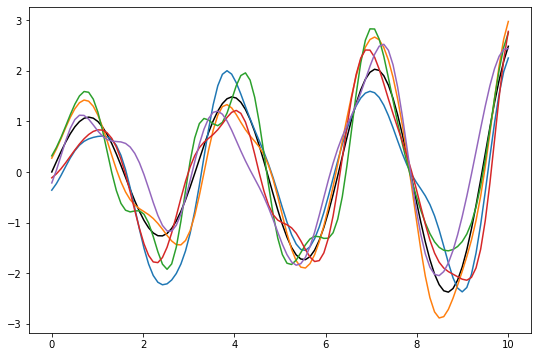

In [64]:
modeles = list()
for donnees in jeux_donnees:
    mod = Modele(nb_bases=20, epsilon=0.2, realite=ma_realite)
    mod.entrainement(donnees)
    modeles.append(mod)
    
fig, rep = plt.subplots(figsize=(9, 6))
ma_realite.dessine(rep)
for mod in modeles:
    mod.dessine(rep)
    



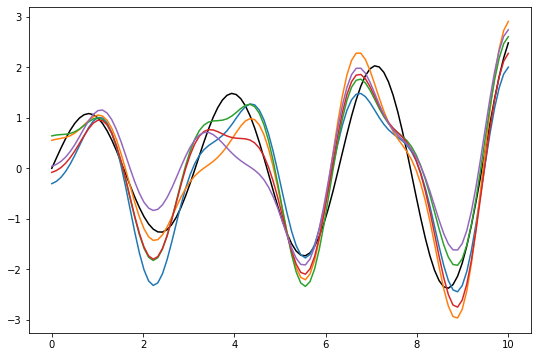

In [65]:
modeles = list()
for donnees in jeux_donnees:
    mod = Modele(nb_bases=10, epsilon=0.2, realite=ma_realite)
    mod.entrainement(donnees)
    modeles.append(mod)
    
fig, rep = plt.subplots(figsize=(9, 6))
ma_realite.dessine(rep)
for mod in modeles:
    mod.dessine(rep)

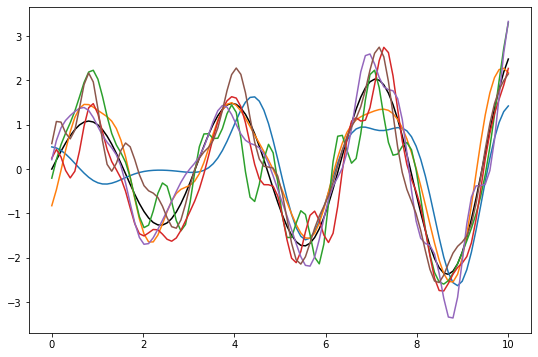

In [67]:
fig, rep = plt.subplots(figsize=(9, 6))
ma_realite.dessine(rep)

for complexite in (10, 20, 30, 40, 50, 60):
    donnees= echantillon_deterministe(taille=complexite, reel=ma_realite, epsilon=0.5)
    m = Modele(nb_bases=complexite, epsilon=0.2, realite=ma_realite)
    m.entrainement(donnees)
    m.dessine(rep)
    

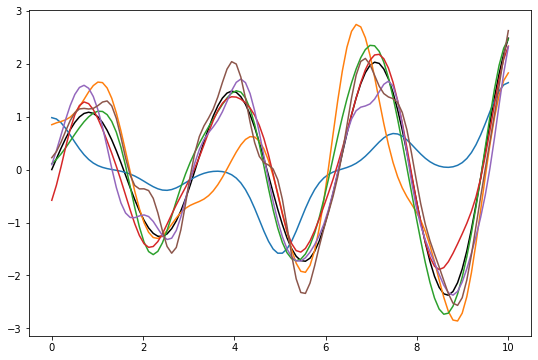

In [68]:
fig, rep = plt.subplots(figsize=(9, 6))
ma_realite.dessine(rep)

for complexite in (10, 20, 30, 40, 50, 60):
    donnees= echantillon_deterministe(taille=complexite, reel=ma_realite, epsilon=0.5)
    m = Modele(nb_bases=int(complexite/2), epsilon=0.2, realite=ma_realite)
    m.entrainement(donnees)
    m.dessine(rep)